# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [7]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('data/lena.png')

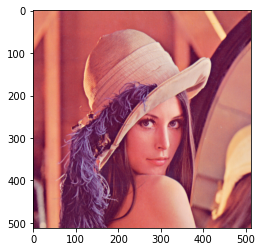

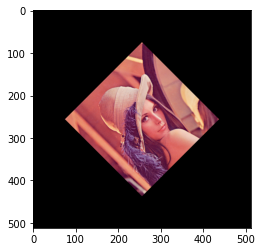

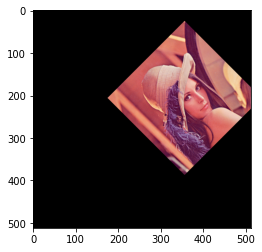

In [20]:
img_copy = img.copy()
rows , cols = img_copy.shape[:2]
'''
warpAffine函數是根據轉移矩陣來進行圖片修改，可以利用getRotationMatrix2D 來快速製造轉移矩陣，或是直接使用np.array來建立矩陣，後者要注意指定dtype = np.float32
'''
rotate_matrix = cv2.getRotationMatrix2D((rows//2 , cols//2 ), 45 , 0.5)

img_rotate = cv2.warpAffine(img, matrix, (cols, rows))

move_matrix = np.array([[1,0,100],[0,1,-50]],dtype = np.float32)

img_move = cv2.warpAffine(img_rotate ,move_matrix ,(cols,rows))

plt.imshow(img_copy[:,:,::-1])
plt.show()
plt.imshow(img_rotate[:,:,::-1])
plt.show()
plt.imshow(img_move[:,:,::-1])
plt.show()

## Affine Transformation - Case 2: any three point

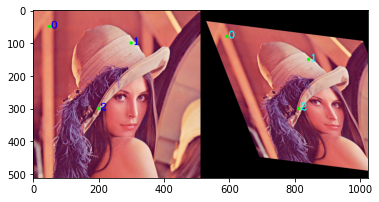

In [2]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
'''
根據上方自訂的仿射前後的座標來建立轉移矩陣，表達想要仿射的程度
'''
M_affine =  cv2.getAffineTransform(pt1, pt2) 
'''
根據提供的轉移矩陣來進行仿射
'''
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))# 將PTS都轉成int並轉為tuple
    cv2.circle(img_copy, pts, 5, (0, 255, 0), -1) # 5pt圓大小  -1為中空圓大小
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))# 將PTS都轉成int並轉為tuple
    cv2.circle(img_affine, pts, 5, (0, 255, 0), -1)# 5pt圓大小  -1為中空圓大小
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0), 2)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
plt.imshow(img_show_affine[:,:,::-1])
plt.show()